In [1]:
import pandas as pd
import numpy as np

# === 1) File path (same folder as your BTCCHF file) ===
path = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\Data_Masterthesis_BTCCHF.xlsx"

# === 2) Load BTCCHF daily and weekly data ===
daily = pd.read_excel(path, sheet_name="BTCCHF daily", index_col=0, parse_dates=True)
weekly = pd.read_excel(path, sheet_name="BTCCHF weekly", index_col=0, parse_dates=True)

# === 3) Compute log returns ===
# Formula: r_t = ln(P_t / P_{t-1})
daily['BTC_ret'] = np.log(daily['BTC_CHF_Last']).diff()
weekly['BTC_ret'] = np.log(weekly['BTC_CHF_Last']).diff()

# Drop first NaN row caused by the diff()
daily = daily.dropna(subset=['BTC_ret'])
weekly = weekly.dropna(subset=['BTC_ret'])

# === 4) Save to new Excel file with returns ===
out_path = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\Data_Masterthesis_BTCCHF_returns.xlsx"

with pd.ExcelWriter(out_path, engine='openpyxl') as writer:
    daily.to_excel(writer, sheet_name="BTCCHF daily + ret")
    weekly.to_excel(writer, sheet_name="BTCCHF weekly + ret")

print("✅ BTC log returns saved to:", out_path)


✅ BTC log returns saved to: C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\Data_Masterthesis_BTCCHF_returns.xlsx


=== Daily BTC Log Returns (CHF) ===
count    3478.000000
mean        0.001689
std         0.035875
min        -0.311651
25%        -0.012429
50%         0.001335
75%         0.016592
max         0.189039
Name: BTC_ret, dtype: float64

=== Weekly BTC Log Returns (CHF) ===
count    530.000000
mean       0.011023
std        0.097703
min       -0.430776
25%       -0.030924
50%        0.009241
75%        0.059879
max        0.381981
Name: BTC_ret, dtype: float64


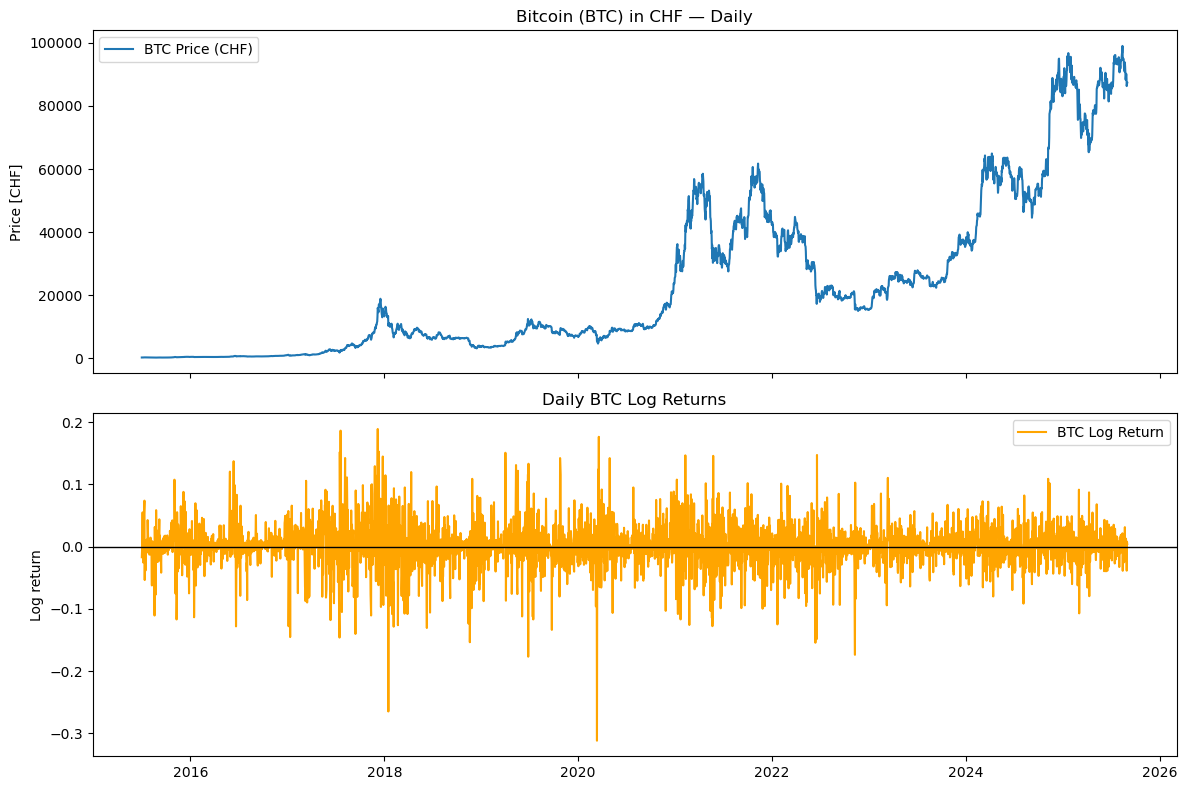

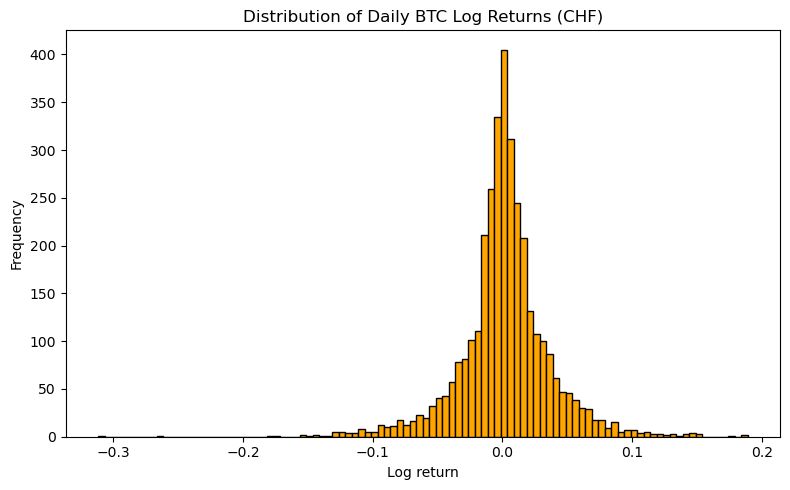

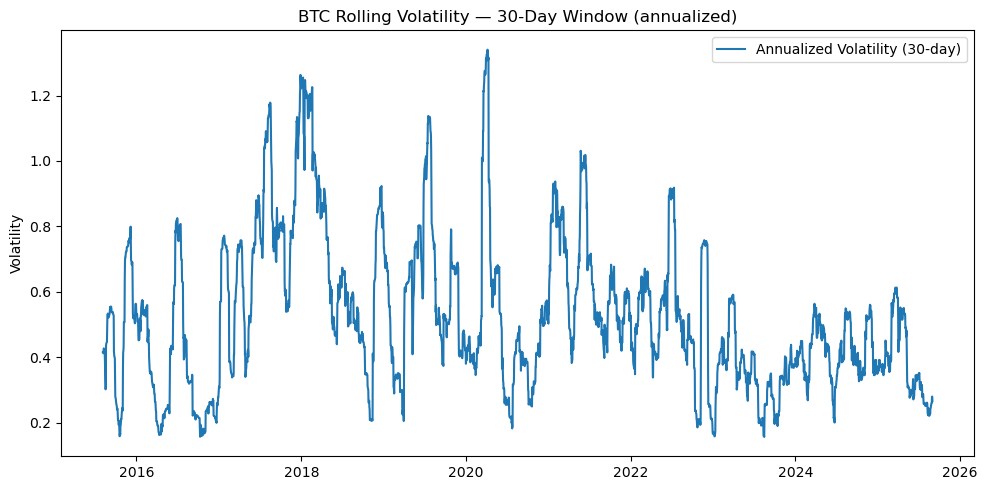

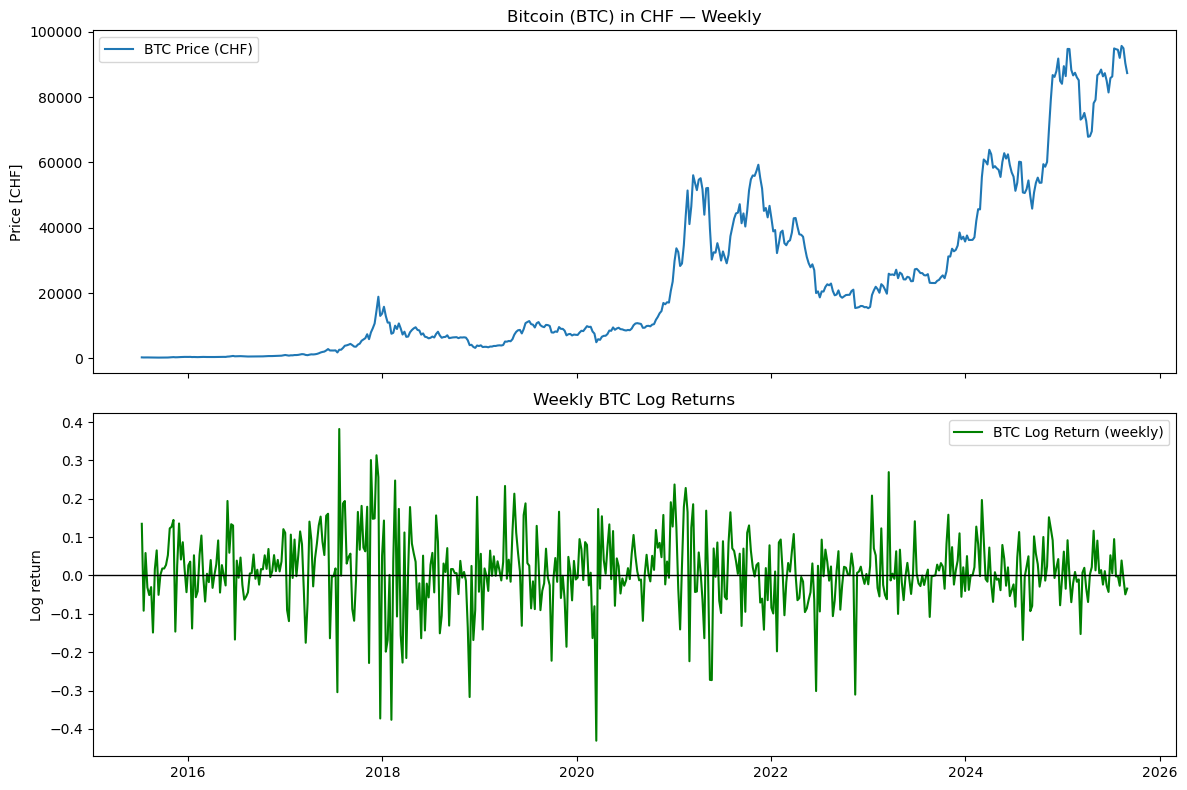

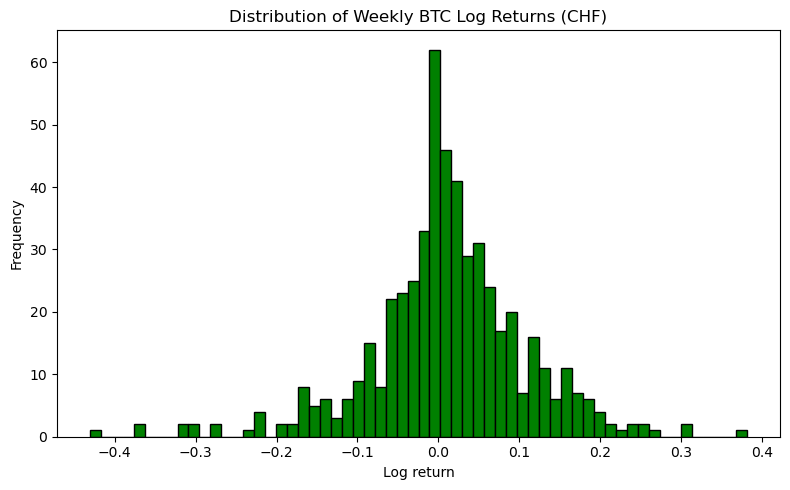

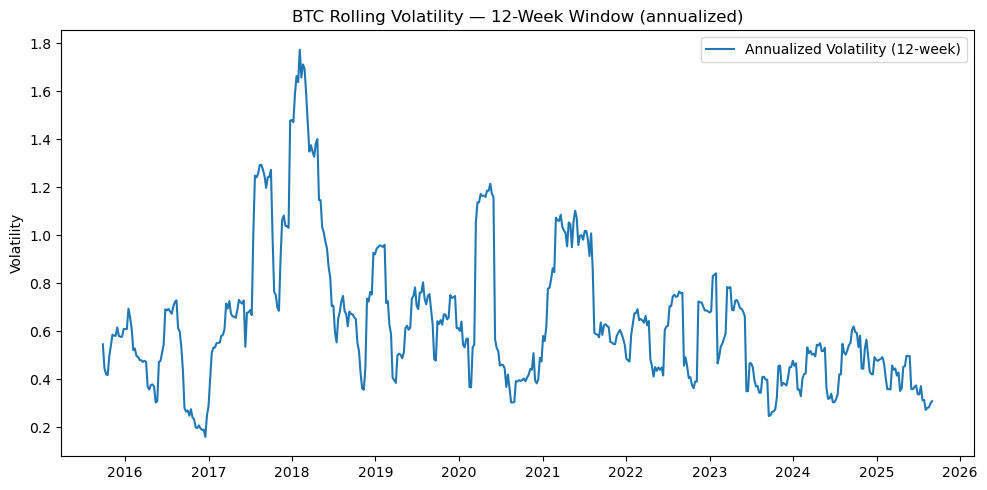

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === 1) Load BTCCHF with log returns ===
path = r"C:\Users\yanni\OneDrive\Dokumente\Hochschule Luzern Master\Masterarbeit\Data_Masterthesis_BTCCHF_returns.xlsx"

daily = pd.read_excel(path, sheet_name="BTCCHF daily + ret", index_col=0, parse_dates=True)
weekly = pd.read_excel(path, sheet_name="BTCCHF weekly + ret", index_col=0, parse_dates=True)

# === 2) Descriptive statistics ===
print("=== Daily BTC Log Returns (CHF) ===")
print(daily['BTC_ret'].describe())
print("\n=== Weekly BTC Log Returns (CHF) ===")
print(weekly['BTC_ret'].describe())

# === 3) Daily BTC price & returns ===
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(daily.index, daily['BTC_CHF_Last'], label='BTC Price (CHF)')
ax[0].set_title('Bitcoin (BTC) in CHF — Daily')
ax[0].set_ylabel('Price [CHF]')
ax[0].legend()

ax[1].plot(daily.index, daily['BTC_ret'], color='orange', label='BTC Log Return')
ax[1].axhline(0, color='black', lw=1)
ax[1].set_title('Daily BTC Log Returns')
ax[1].set_ylabel('Log return')
ax[1].legend()

plt.tight_layout()
plt.show()

# === 4) Histogram of daily returns ===
plt.figure(figsize=(8,5))
plt.hist(daily['BTC_ret'].dropna(), bins=100, color='orange', edgecolor='black')
plt.title('Distribution of Daily BTC Log Returns (CHF)')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# === 5) Rolling volatility (30-day window, annualized) ===
daily['RollingVol30'] = daily['BTC_ret'].rolling(30).std()
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily['RollingVol30'] * np.sqrt(252), label='Annualized Volatility (30-day)')
plt.title('BTC Rolling Volatility — 30-Day Window (annualized)')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# === 6) Weekly BTC price & returns ===
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(weekly.index, weekly['BTC_CHF_Last'], label='BTC Price (CHF)')
ax[0].set_title('Bitcoin (BTC) in CHF — Weekly')
ax[0].set_ylabel('Price [CHF]')
ax[0].legend()

ax[1].plot(weekly.index, weekly['BTC_ret'], color='green', label='BTC Log Return (weekly)')
ax[1].axhline(0, color='black', lw=1)
ax[1].set_title('Weekly BTC Log Returns')
ax[1].set_ylabel('Log return')
ax[1].legend()

plt.tight_layout()
plt.show()

# === 7) Histogram of weekly returns ===
plt.figure(figsize=(8,5))
plt.hist(weekly['BTC_ret'].dropna(), bins=60, color='green', edgecolor='black')
plt.title('Distribution of Weekly BTC Log Returns (CHF)')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# === 8) Rolling volatility (12-week window, annualized) ===
weekly['RollingVol12w'] = weekly['BTC_ret'].rolling(12).std()
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly['RollingVol12w'] * np.sqrt(52), label='Annualized Volatility (12-week)')
plt.title('BTC Rolling Volatility — 12-Week Window (annualized)')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()


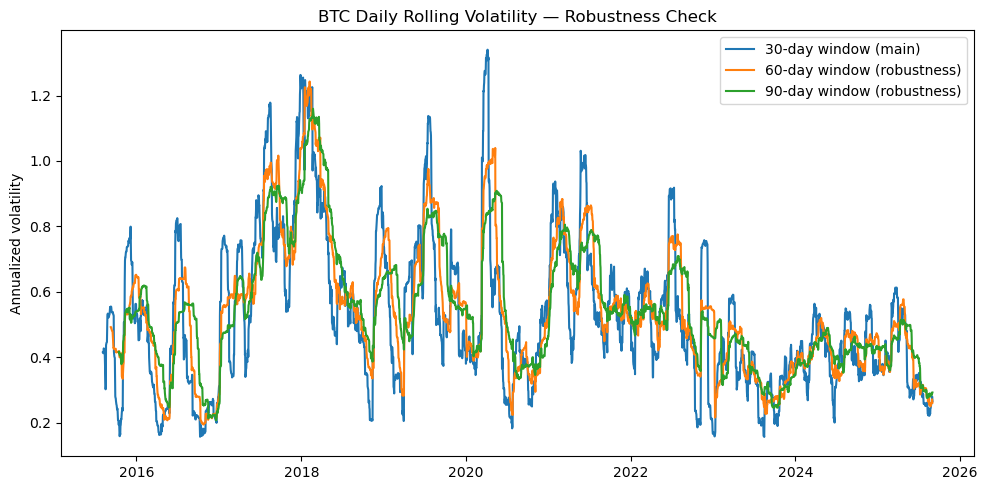

In [5]:
# === Robustness check: different rolling windows (daily) ===

# Compute alternative rolling volatilities
daily['RollingVol60'] = daily['BTC_ret'].rolling(60).std()
daily['RollingVol90'] = daily['BTC_ret'].rolling(90).std()

# Plot comparison (annualized)
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily['RollingVol30'] * np.sqrt(252), label='30-day window (main)')
plt.plot(daily.index, daily['RollingVol60'] * np.sqrt(252), label='60-day window (robustness)')
plt.plot(daily.index, daily['RollingVol90'] * np.sqrt(252), label='90-day window (robustness)')
plt.title('BTC Daily Rolling Volatility — Robustness Check')
plt.ylabel('Annualized volatility')
plt.legend()
plt.tight_layout()
plt.show()


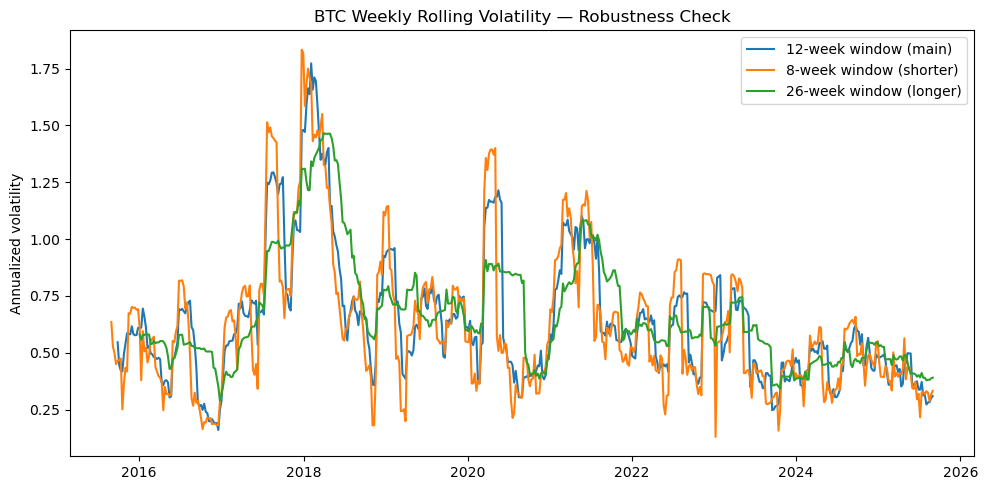

In [3]:
# === Robustness check: compare different rolling windows ===

# Compute alternative rolling volatilities
weekly['RollingVol8w']  = weekly['BTC_ret'].rolling(8).std()
weekly['RollingVol26w'] = weekly['BTC_ret'].rolling(26).std()

# Plot comparison (annualized)
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly['RollingVol12w'] * np.sqrt(52), label='12-week window (main)')
plt.plot(weekly.index, weekly['RollingVol8w']  * np.sqrt(52), label='8-week window (shorter)')
plt.plot(weekly.index, weekly['RollingVol26w'] * np.sqrt(52), label='26-week window (longer)')
plt.title('BTC Weekly Rolling Volatility — Robustness Check')
plt.ylabel('Annualized volatility')
plt.legend()
plt.tight_layout()
plt.show()
